In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from Utils import *
from IPython.display import display
from itertools import cycle

# Loading data

In [2]:
train_stratified_directory = 'MajorityVote/group_train.csv'
validation_directory = 'MajorityVote/group_validation.csv'

In [3]:
features = ['Weekday', 'ScanCount', 'DepartmentDescription', 'FinelineNumber', 'Upc']

In [4]:
train_stratified, train_stratified_label = load_shopping_data(train_stratified_directory, features)
validation, validation_label = load_shopping_data(validation_directory, features)

# Data Overview

In [5]:
train_data = pd.read_csv(train_stratified_directory)
display(train_data.head(5))
del train_data

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,42,126322,7,4.321362e+09,1,64,1912.0
1,42,126322,7,7.283877e+09,2,30,3625.0
2,42,126322,7,7.871545e+09,2,23,4900.0
3,42,126322,7,6.862263e+10,1,22,2025.0
4,42,126322,7,3.429905e+09,1,36,4902.0


In [6]:
(n_classes, count) = np.unique(train_stratified_label, return_counts=True)
number_of_classes = len(n_classes)
print('There are total of %d classes in the training set\n' % number_of_classes)

print('We have %d rows and %d columns in stratified training set.\n\
We have %d rows and %d columns in validation set.\n' %
     (train_stratified.shape[0], train_stratified.shape[1],
      validation.shape[0], validation.shape[1]))

print('Number of trainning data in each class is shown below:')
half = int(number_of_classes/2)
first_half = np.vstack([n_classes[:half], count[:half]])
second_half = np.vstack([n_classes[half:], count[half:]])
df = pd.DataFrame(first_half[1,:].reshape(1,-1))
df.columns = first_half[0,:]
display(df)

df = pd.DataFrame(second_half[1,:].reshape(1,-1))
df.columns = second_half[0,:]
display(df)

There are total of 37 classes in the training set

We have 9965 rows and 5 columns in stratified training set.
We have 4994 rows and 5 columns in validation set.

Number of trainning data in each class is shown below:


,3,4,5,6,7,8,9,12,15,18,19,20,21,22,23,24,25,26
0,98,6,198,83,284,322,279,59,67,58,32,43,94,55,7,194,389,18


,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,999
0,42,53,41,114,45,180,159,93,169,340,641,618,1407,2611,94,451,70,253,298


# Training

In [7]:
classifier = svm.SVC(kernel='rbf', decision_function_shape='ovr')
classifier.fit(train_stratified, train_stratified_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
train_accuracy = classifier.score(train_stratified, train_stratified_label)
testing_accuracy = classifier.score(validation, validation_label)
print('Training accuracy =', train_accuracy)
print("Testing accuracy =", testing_accuracy)

Training accuracy = 0.832413447065
Testing accuracy = 0.266519823789


## Cross Validation  

In [9]:
cv_train = np.vstack([train_stratified, validation])
cv_label = np.hstack([train_stratified_label, validation_label])

In [10]:
cv_result = crossValidation(cv_train, cv_label, classifier, cv=5)

In [11]:
print("The result for each fold is \n", cv_result[:, 0])
print("The average result is %f, with standard deviation of %f" % (cv_result.mean(), cv_result.std()))

The result for each fold is 
 [ 0.27114677  0.26579739  0.26813775  0.26579739  0.26844741]
The average result is 0.267865, with standard deviation of 0.001987


# Grid Search on C and gamma

In [12]:
c_options = [0.01, 0.05, 0.1, 0.5 , 1, 10]
gamma_options = [1/5, 1/2, 1]
num_c = len(c_options)
num_gammas = len(gamma_options)
numer_of_cv = 5
search_result = np.zeros([num_c*num_gammas, numer_of_cv])

# Do not rerun, takes about 30 miniutes to finish

In [13]:
for i in range(num_c):
    for j in range(num_gammas):
        clf = svm.SVC(C = c_options[i], gamma=gamma_options[j], kernel='rbf', decision_function_shape='ovr')
        values = crossValidation(cv_train, cv_label, clf, numer_of_cv)
        values = np.ravel(values)
        search_result[num_gammas*i+j, :] = values
        print('Running on combo c=%0.2f, gamma=%0.2f, mean = %f' % 
              ( c_options[i], gamma_options[j], values.mean()))

Running on combo c=0.01, gamma=0.20, mean = 0.270739
Running on combo c=0.01, gamma=0.50, mean = 0.270742
Running on combo c=0.01, gamma=1.00, mean = 0.270740
Running on combo c=0.05, gamma=0.20, mean = 0.270741
Running on combo c=0.05, gamma=0.50, mean = 0.270740
Running on combo c=0.05, gamma=1.00, mean = 0.270740
Running on combo c=0.10, gamma=0.20, mean = 0.270739
Running on combo c=0.10, gamma=0.50, mean = 0.270739
Running on combo c=0.10, gamma=1.00, mean = 0.270741
Running on combo c=0.50, gamma=0.20, mean = 0.272547
Running on combo c=0.50, gamma=0.50, mean = 0.269669
Running on combo c=0.50, gamma=1.00, mean = 0.269405
Running on combo c=1.00, gamma=0.20, mean = 0.269001
Running on combo c=1.00, gamma=0.50, mean = 0.266461
Running on combo c=1.00, gamma=1.00, mean = 0.267062
Running on combo c=10.00, gamma=0.20, mean = 0.248215
Running on combo c=10.00, gamma=0.50, mean = 0.249882
Running on combo c=10.00, gamma=1.00, mean = 0.251216


In [27]:
opt = np.argmax(search_result.mean(axis = 1))
opt_c = c_options[int(np.floor(float(opt)/num_gammas))]
opt_gamma = gamma_options[opt % num_gammas]

print('The best result is obtained with C  = %0.2f, gamma = %0.2f, mean = %f, std = %f' % 
        (opt_c, opt_gamma, search_result[opt,:].mean(), search_result[opt,:].std()))

The best result is obtained with C  = 0.50, gamma = 0.20, mean = 0.272547, std = 0.004990


# Final Classifier

In [21]:
test_directory = 'MajorityVote/group_test.csv'
test, test_label = load_shopping_data(test_directory, features)

In [23]:
clf = svm.SVC(C = opt_c, gamma = opt_gamma, kernel='rbf', decision_function_shape='ovr')
clf.fit(cv_train, cv_label)
train_accuracy = classifier.score(cv_train, cv_label)
testing_accuracy = classifier.score(test, test_label)
print('Training accuracy =', train_accuracy)
print("Testing accuracy =", testing_accuracy)

Training accuracy = 0.709606257103
Testing accuracy = 0.235064545182


## Confusion Matrix

In [24]:
pred = clf.predict(test)
n_classes = np.array(n_classes)
confusion_mat = confusion_matrix(pred, test_label, n_classes.tolist())
confusion = pd.DataFrame(confusion_mat)
confusion.columns = np.unique(train_stratified_label)
confusion.head(8)

,3,4,5,6,7,8,9,12,15,18,...,36,37,38,39,40,41,42,43,44,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,104.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,159.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,367.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,290.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0


## Micro ROC Curve

In [25]:
y_score = clf.decision_function(test)
lb = LabelBinarizer()
new_test_label = lb.fit(train_stratified_label).transform(test_label)
fpr, tpr = roc_curve(new_test_label.ravel(), y_score.ravel())

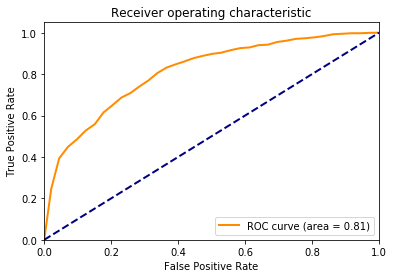

In [26]:
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()